# Edoardo Antonaci 1234431

## Exercise 1

###  • The triangular distribution f(X), in the interval (a, b), is given by the following:
               
###   \begin{cases}  2(x − a)/ (b - a)(c − a), & \mbox{if }\mbox{ a ≤ x < c} \\ 2(b − x)/(b − a)(b − c), & \mbox{if}\mbox{ c ≤ x ≤ b}\\0 &\mbox{otherwise}\end{cases} 

### where c ∈ [a, b].
               

              


### a) plot the function, given the interval (a, b)

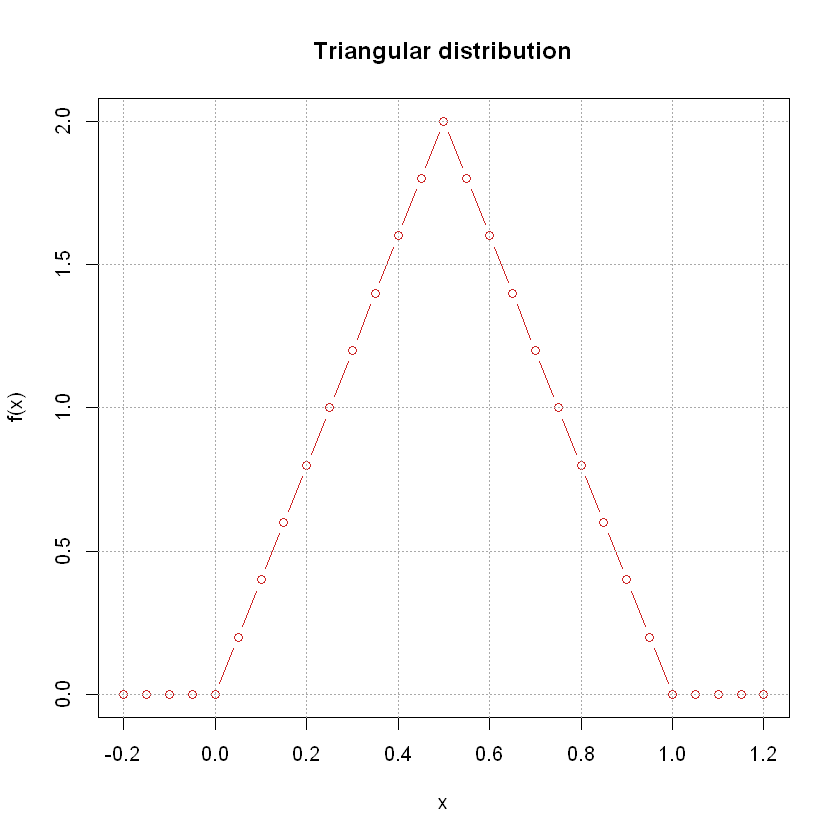

In [1]:

tria<- function(x, a=0, b=1, c=0.5){
    f<-c()
    i<-1
    while(i<=length(x)){
        
        if (x[i]<c & x[i]>=a){
            f<-c(f,2*(x[i]-a)/( (c-a)*(b-a) ) ) 
        }
        
        else if (x[i]>=c & x[i]<=b){
            f<-c(f,2*(b-x[i])/( (b-a)*(b-c) ) )
        }
        
        else {f<-c(f,0)}
        
        i<-i+1
    }
    return(f)
}

x<-seq(-0.2, 1.2, by = 0.05)


plot(x , tria(x=x), col="firebrick3",type="b", xlab="x", ylab="f(x)", main="Triangular distribution" )
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")

### b) and write an algorithm to generate random numbers from the triangular distribution


In [2]:
max<-0.5

rtria<-function(a=0,b=1,n,M=tria(x=max ) ) {
    r_numb<-c()
    
    while(length(r_numb)<n){
    r1<-runif(n=1)
    r2<-runif(n=1)
        
    x1<-a+(b-a)*r1
    y<-M*r2
    
    if( y<=tria(x=x1) ){
        r_numb<-c(r_numb,x1)
    }
        
    }
    
    return(r_numb)
}



### c) generate 10<sup>4</sup> random number from the distribution, show them in an histogram and superimpose the analytical curve

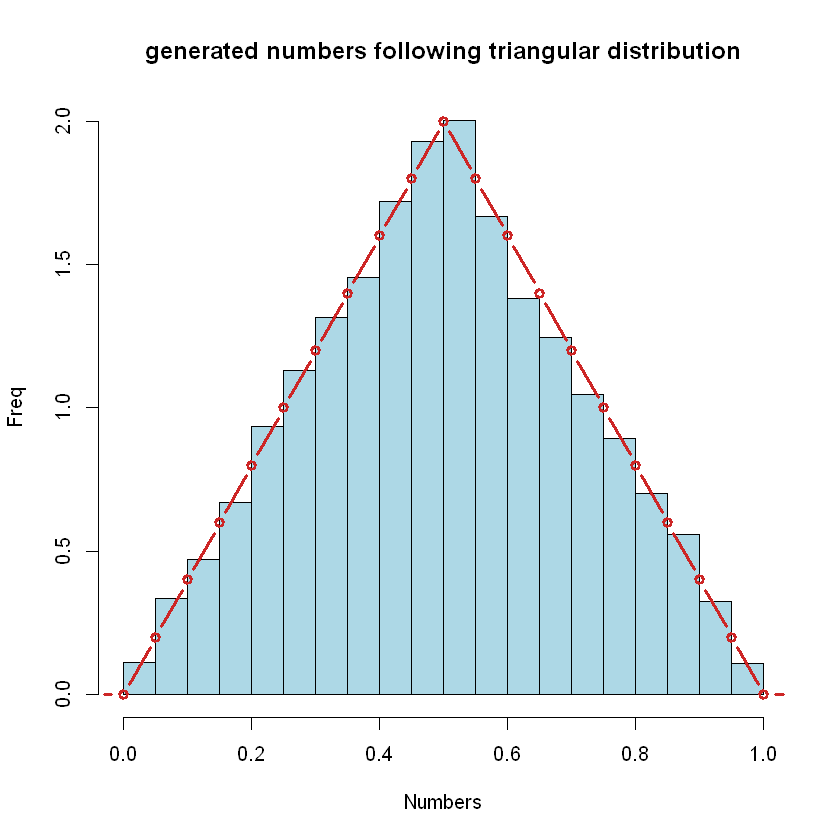

In [3]:
tr_numbers<-rtria(n=10^4)

hist(tr_numbers,xlab="Numbers",ylab="Freq",col="lightblue",freq=FALSE,
     main=("generated numbers following triangular distribution"),ylim=c(0,2))

lines(x , tria(x=x), col="firebrick3",type="b",lwd=2.5)


## Exercise 2 - Markov’s inequality

### • Markov’s inequality represents an upper bound to probability distributions:

### <p style="text-align: center;">                P(X ≥ k) ≤ E[X]/k               for k > 0 </p>

### • having defined a function G(k) = 1 − F(k) ≡ P(X ≥ k) plot G(k) and the Markov’s upper bound for

### a) the exponential, Exp(λ = 1), distribution function


### b) the uniform, U(3, 5), distribution function

### c) the binomial, Bin(n = 1, p = 1/2), distribution function

### d) a Poisson, Pois(λ = 1/2), distribution function


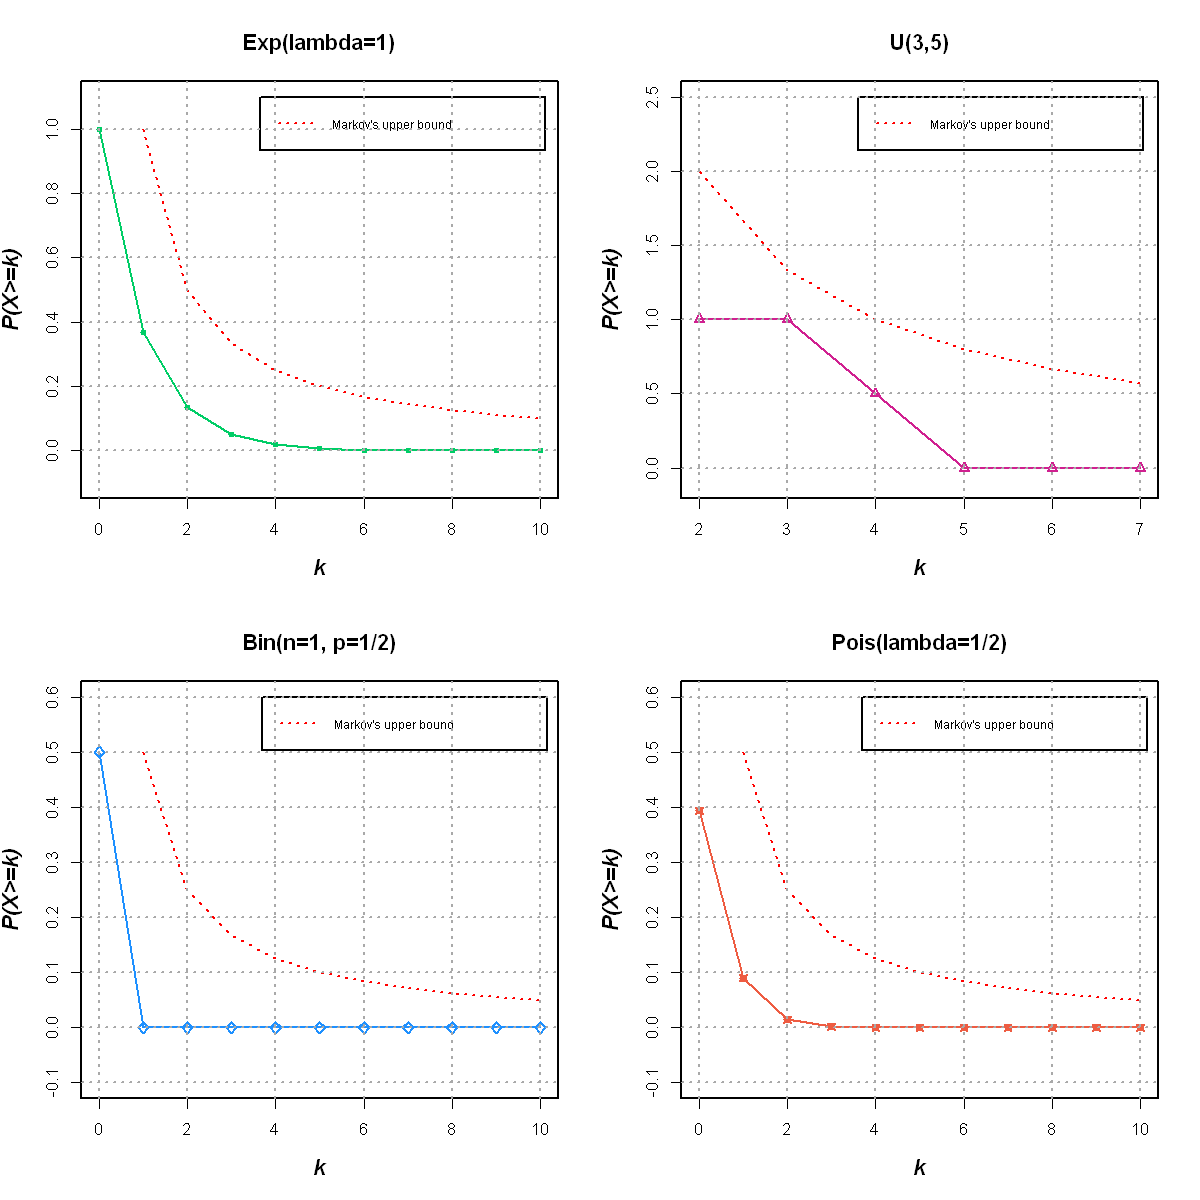

In [4]:
par(mfrow=c(2,2),font.lab=4,cex.main=1.3,cex.lab=1.3,lwd=2,options(repr.plot.width=10, repr.plot.height=10))
limexp <- function(x){
    return(1/x)
}
limunif.3.5 <- function(x){
    return(4/x)
}
limbinom <- function(x){
    return(1/(2*x))
}
limpois <- function(x){
    return(1/(2*x))
}

#Exp
plot(c(0:10),1-pexp(c(0:10)), col="springgreen3", type="o",  pch=c(20), 
    xlab="k", ylab="P(X>=k)", ylim=c(-0.1,1.1), main="Exp(lambda=1)" )
lines(c(0:10),limexp(c(0:10)), col="red", lty="dotted", pch=c(2))
legend(3.65, 1.1, c("Markov's upper bound"), col="red", lty="dotted", cex=0.7)
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")

#uniform 
plot(c(2:7),1-punif(c(2:7), min=3, max=5), col="violetred", type="o", pch=c(2),
    xlab="k", ylab="P(X>=k)", ylim=c(-0.1,2.5), main="U(3,5)")
lines(c(2:7),limunif.3.5(c(2:7)), col="red", lty="dotted", pch=c(2))
legend(3.8, 2.5, c("Markov's upper bound"), col="red", lty="dotted", cex=0.7)
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")

#Bin
plot(c(0:10),1-pbinom(c(0:10), size=1, prob=1/2), col="dodgerblue", type="o", pch=c(5),
    xlab="k", ylab="P(X>=k)", ylim=c(-0.1,0.6), main="Bin(n=1, p=1/2)")
lines(c(0:10),limbinom(c(0:10)), col="red", lty="dotted", pch=c(2))
legend(3.7, 0.6, c("Markov's upper bound"), col="red", lty="dotted", cex=0.7)
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")

#Poisson
plot(c(0:10),1-ppois(c(0:10), lambda=1/2), col="tomato2", type="o", pch=c(13),
    xlab="k", ylab="P(X>=k)", ylim=c(-0.1,0.6), main="Pois(lambda=1/2)")
lines(c(0:10),limpois(c(0:10)), col="red", lty="dotted", pch=c(2))
legend(3.7, 0.6, c("Markov's upper bound"), col="red", lty="dotted", cex=0.7)
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")

## Exercise 3 - Chebyshev’s inequality

### • Chebyshev’s inequality tell us that

### <p style="text-align: center;">               P(|X − µ| ≥ kσ) ≤ 1/k<sup>2</sup>           for k > 0 </p>

### • which can also be written as

### <p style="text-align: center;">      P( |X − µ| < kσ) ≥ 1 − 1/k<sup>2</sup>      for k > 0 </p>
    
### • use R to show, with a plot, that Chebyshev’s inequality is  an upper bound to the following distributions:


### a) a normal distribution, N(µ = 3, σ = 5)


### b) an exponential distribution, Exp(λ = 1)


### c) a uniform distribution U(1 −√2, 1 + √2)


### d) a Poisson, Pois(λ = 1/3), distribution function


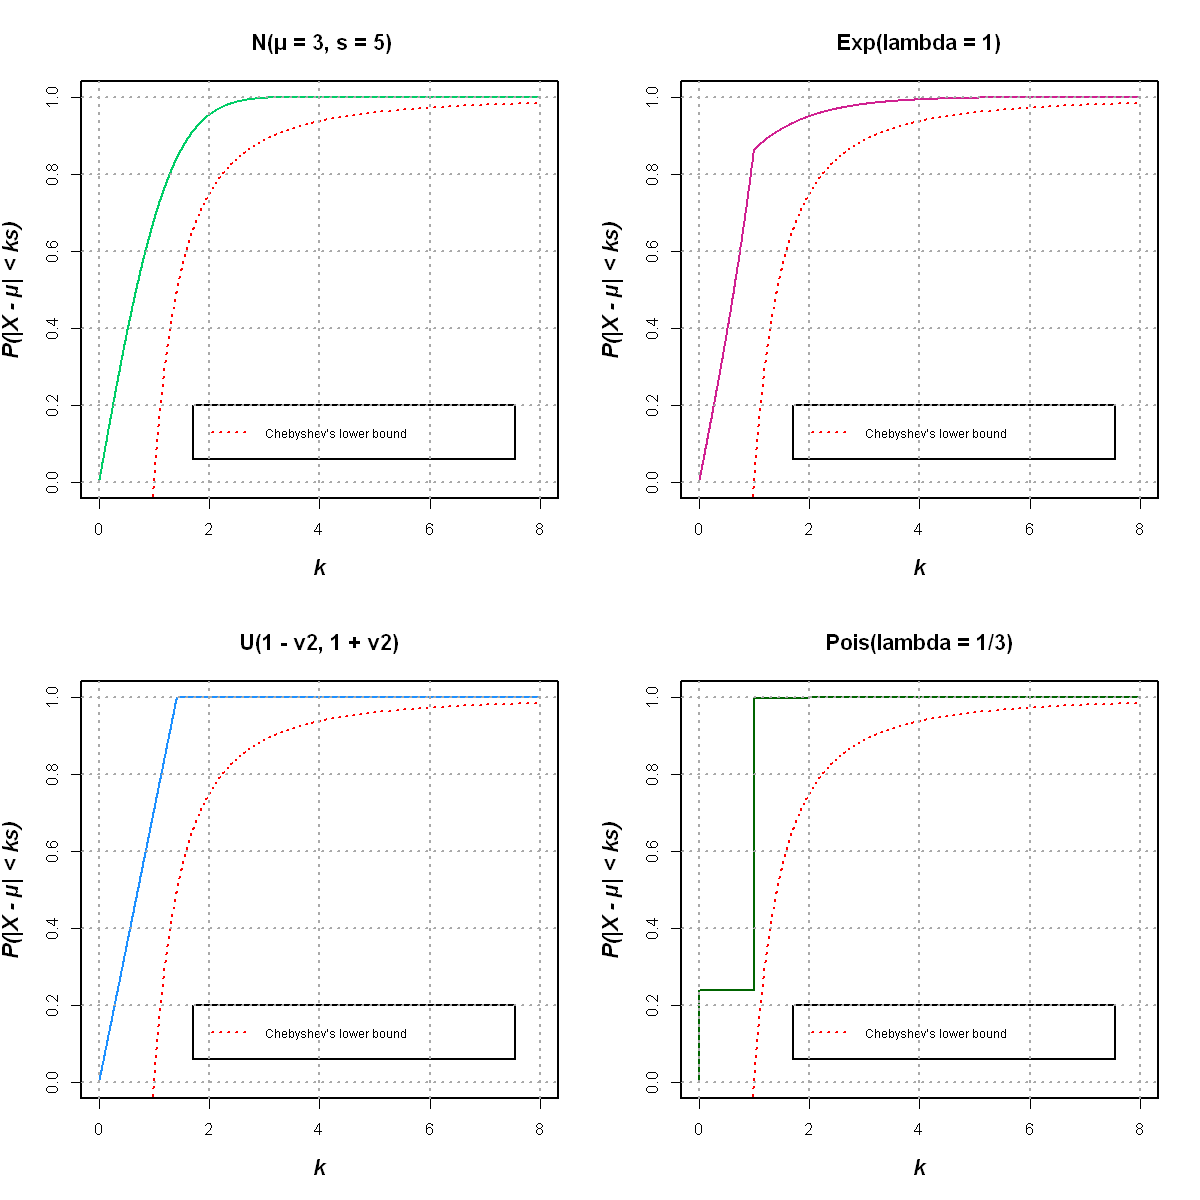

In [5]:
par(mfrow=c(2,2),font.lab=4,cex.main=1.3,cex.lab=1.3,lwd=2)
k <- seq(0, 8, by=.005)

kk <- seq(1, 5, length= 500)

Ch<-function(){
lines(k, 1 - 1/k^2, col="red", lty="dotted")
legend(1.7, 0.2, c("Chebyshev’s lower bound"), col="red", lty="dotted",cex=0.7)
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")
 options(repr.plot.width=10, repr.plot.height=10)
}

#Normal
plot(k, pnorm(3+k*5,3,5)-pnorm(3-k*5,3,5), ylim=c(0,1), col="springgreen3",
     ylab="P(|X − µ| < kσ)", main=" N(µ = 3, σ = 5)", type='l')
    Ch()
#Exp
plot(k, pexp(1+k,1,1)-pexp(1-k,1,1), type="l", ylim=c(0,1), 
     ylab="P(|X − µ| < kσ)", main="Exp(lambda = 1)", col="violetred")
    Ch()
#Uniform
plot(k, punif(1+k,1-sqrt(2),1+sqrt(2))-punif(1-k,1-sqrt(2),1+sqrt(2)), type="l",
    ylim=c(0,1), ylab="P(|X − µ| < kσ)", main="U(1 − √2, 1 + √2)", col="dodgerblue")
    Ch()
#Pois
plot(k, ppois(1+k,1/3)-ppois(1-k,1/3),type="l", ylim=c(0,1),
     ylab="P(|X − µ| < kσ)", main='Pois(lambda = 1/3)', col="darkgreen")
    Ch()

## Exercise 4 - Community Mobility Open Data

### • Community Mobility Reports have been created with the aim to provide insights into what
### has changed in response to policies aimed at combating COVID-19. Data can be found at
### https://www.google.com/covid19/mobility/
### • Download and analyze the following data sets:
### - https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv
### and
### - https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

In [6]:
library("purrr")
library("lubridate")

Warning message:
"package 'purrr' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [7]:

read_my_csv<-function(year,country) {
    
filename <- paste0(year,"_",country,"_","Region_Mobility_Report.csv ")
mobdata_dir <- "Region_Mobility_Report_CSVs"
filepath <- file.path(mobdata_dir,filename, fsep="/")
    
message ( paste (" Reading from file :", filepath ))
read.csv( filepath )
}



years <- 2020:2021
country <-c("IT","DE")

mbdata_ita<- map_df(years,read_my_csv,country[1])

mbdata_ger <-map_df(years,read_my_csv,country[2])


 Reading from file : Region_Mobility_Report_CSVs/2020_IT_Region_Mobility_Report.csv 
 Reading from file : Region_Mobility_Report_CSVs/2021_IT_Region_Mobility_Report.csv 
 Reading from file : Region_Mobility_Report_CSVs/2020_DE_Region_Mobility_Report.csv 
 Reading from file : Region_Mobility_Report_CSVs/2021_DE_Region_Mobility_Report.csv 


In [8]:
MI<-mbdata_ita[mbdata_ita$sub_region_1=="",]
MI<-MI[,which(colnames(MI)=="date"):ncol(MI)]

#create a new dataframe
MI<-data.frame("date"=MI$date,"week"=week(MI$date),"month"=month(MI$date),MI[,-1])

MI$week[which(MI$week==max(MI$week) )[1]:length(MI$week)]<-MI$week[which(MI$week==max(MI$week) )[1]:length(MI$week)]+54

MI$month[which(MI$month==max(MI$month) )[1]:length(MI$month)]<-MI$month[which(MI$month==max(MI$month) )[1]:length(MI$month)]+12

#averanging on weeks and months
week_IT<-as.data.frame(sapply(MI[,c(-1,-3)], tapply, MI$week,mean))

month_IT<-as.data.frame(sapply(MI[,c(-1,-2)], tapply, MI$month,mean))


In [9]:
graph<-function(data,xlab,country){
par(mfrow=c(3,2),font.lab=4,oma=c(4,0,4,0))


col=c("cadetblue","brown1","orange1","magenta","royalblue2","seagreen1")
main=c("retail_and_recreation","grocery and pharmacy","parks","transit stations","workplaces","residential")


for (i in 1:6) {

    plot(data[,i+1],type="b",col=col[i],main=main[i],ylab="% change from baseline",
         xlab=xlab,cex.lab=1.7,lwd=2,cex.main=2)
    grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")
    options(repr.plot.width=15, repr.plot.height=15)
    
    }
    
title(country,outer=TRUE,cex.main=3)
}


### • Select a couple of European countries of your choice and analyze the trends in the previous variables over time:

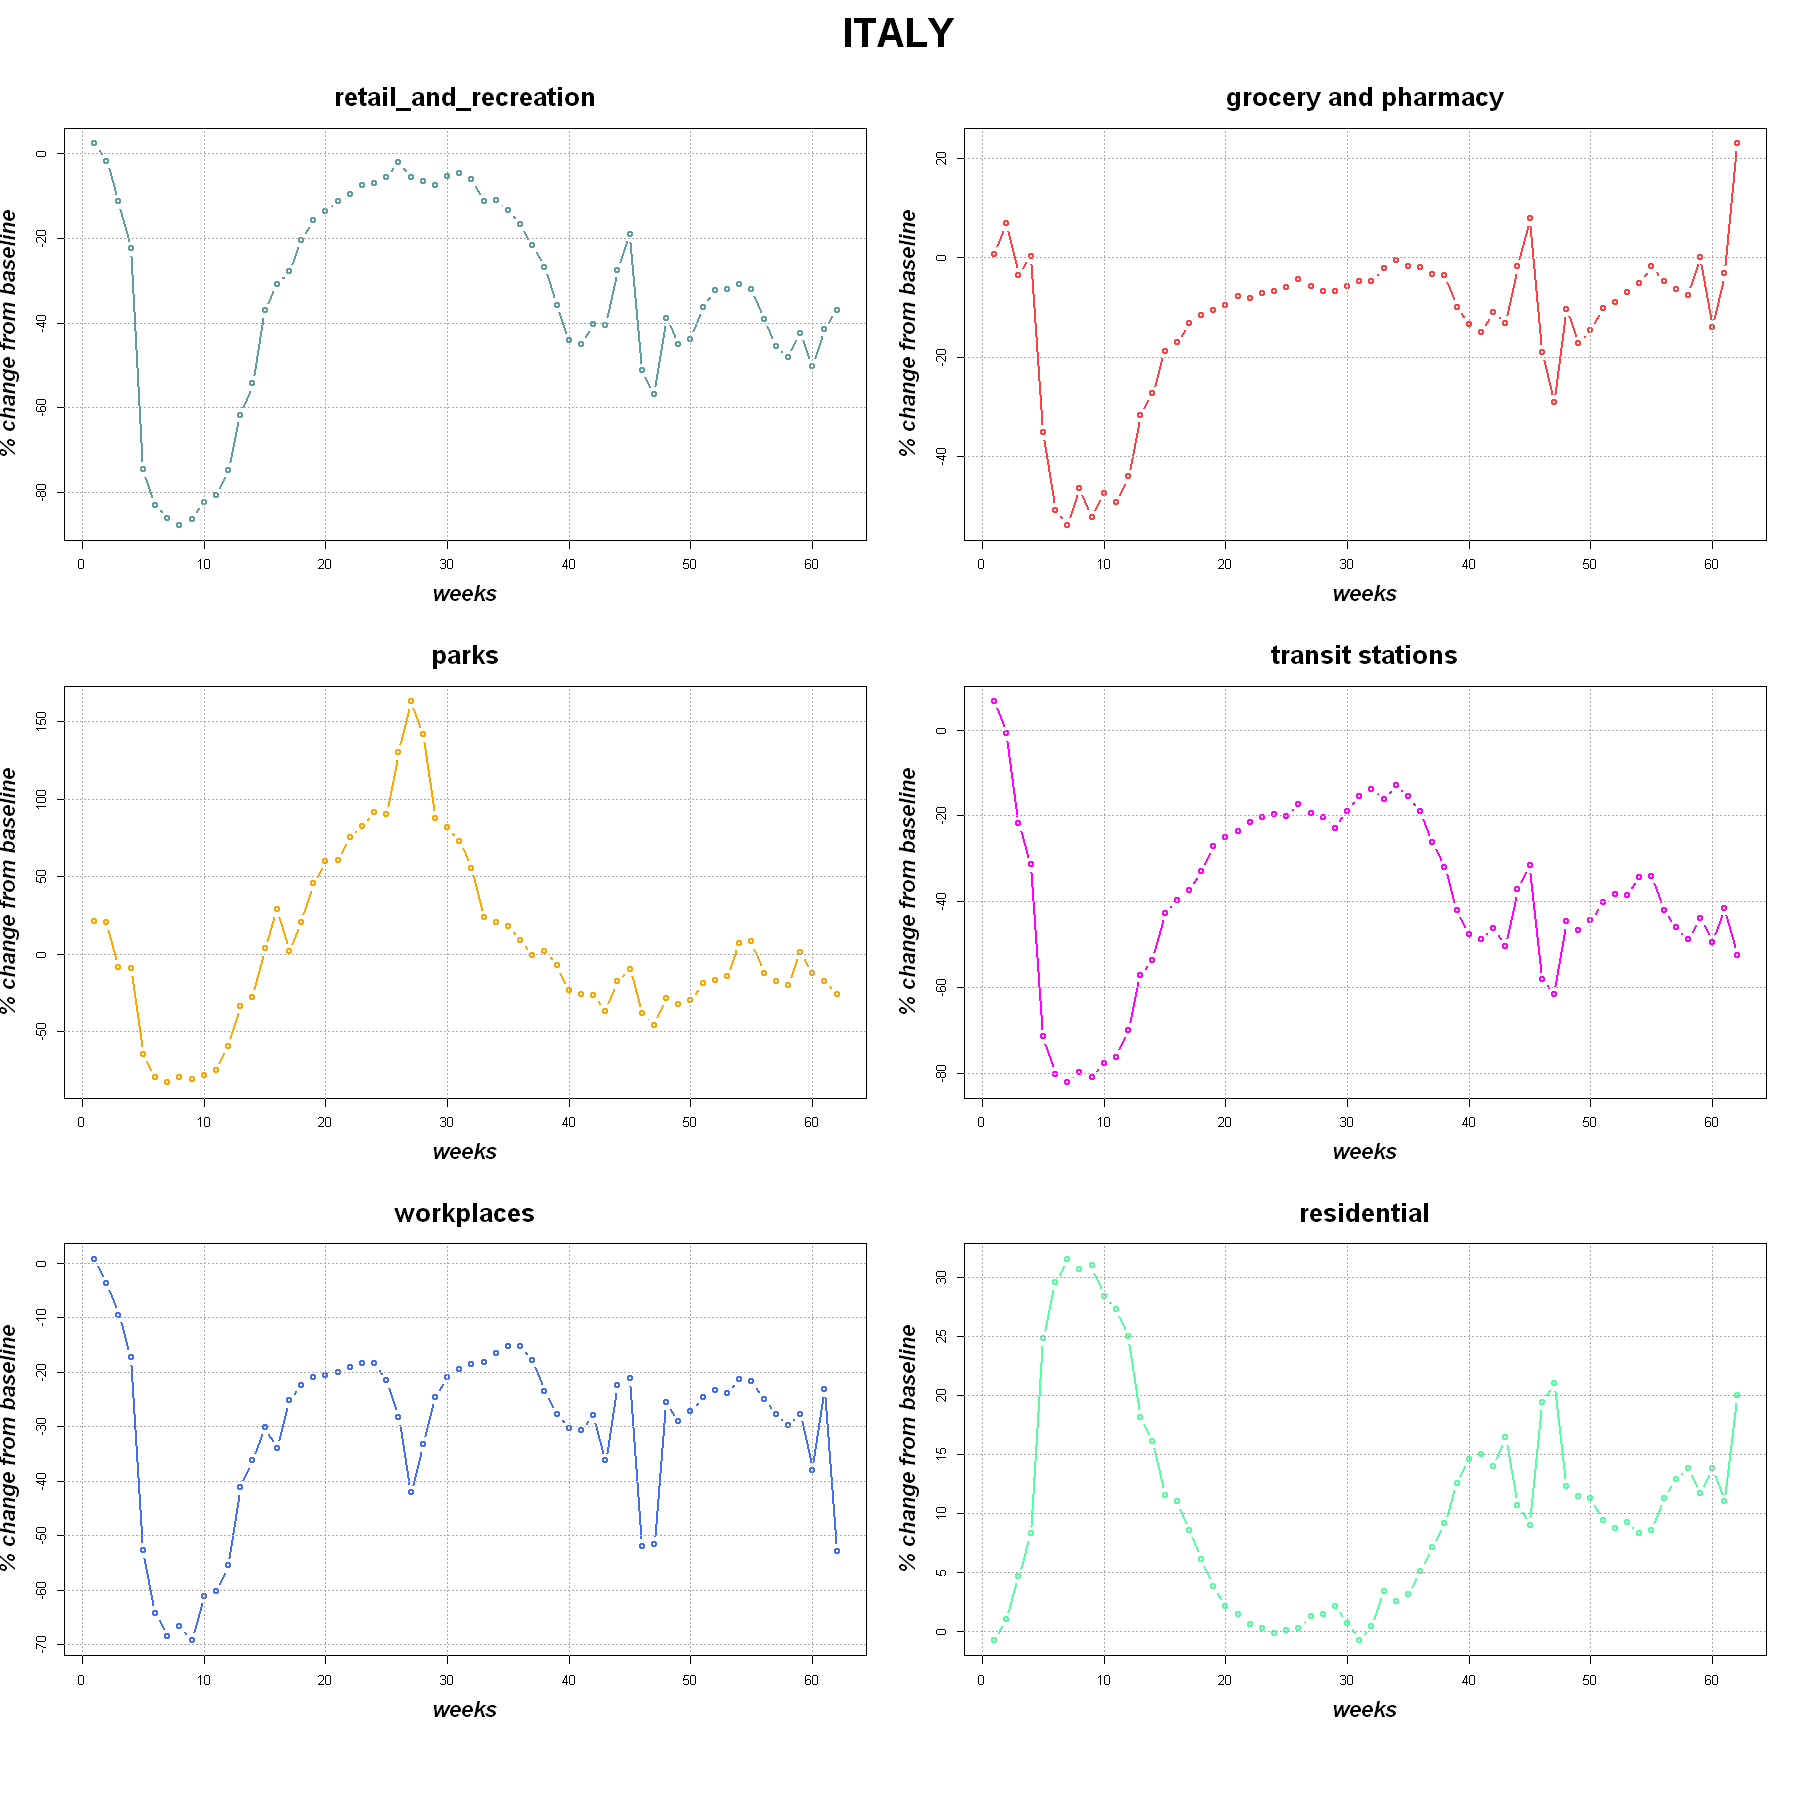

In [10]:
graph(data=week_IT,xlab="weeks",country="ITALY")

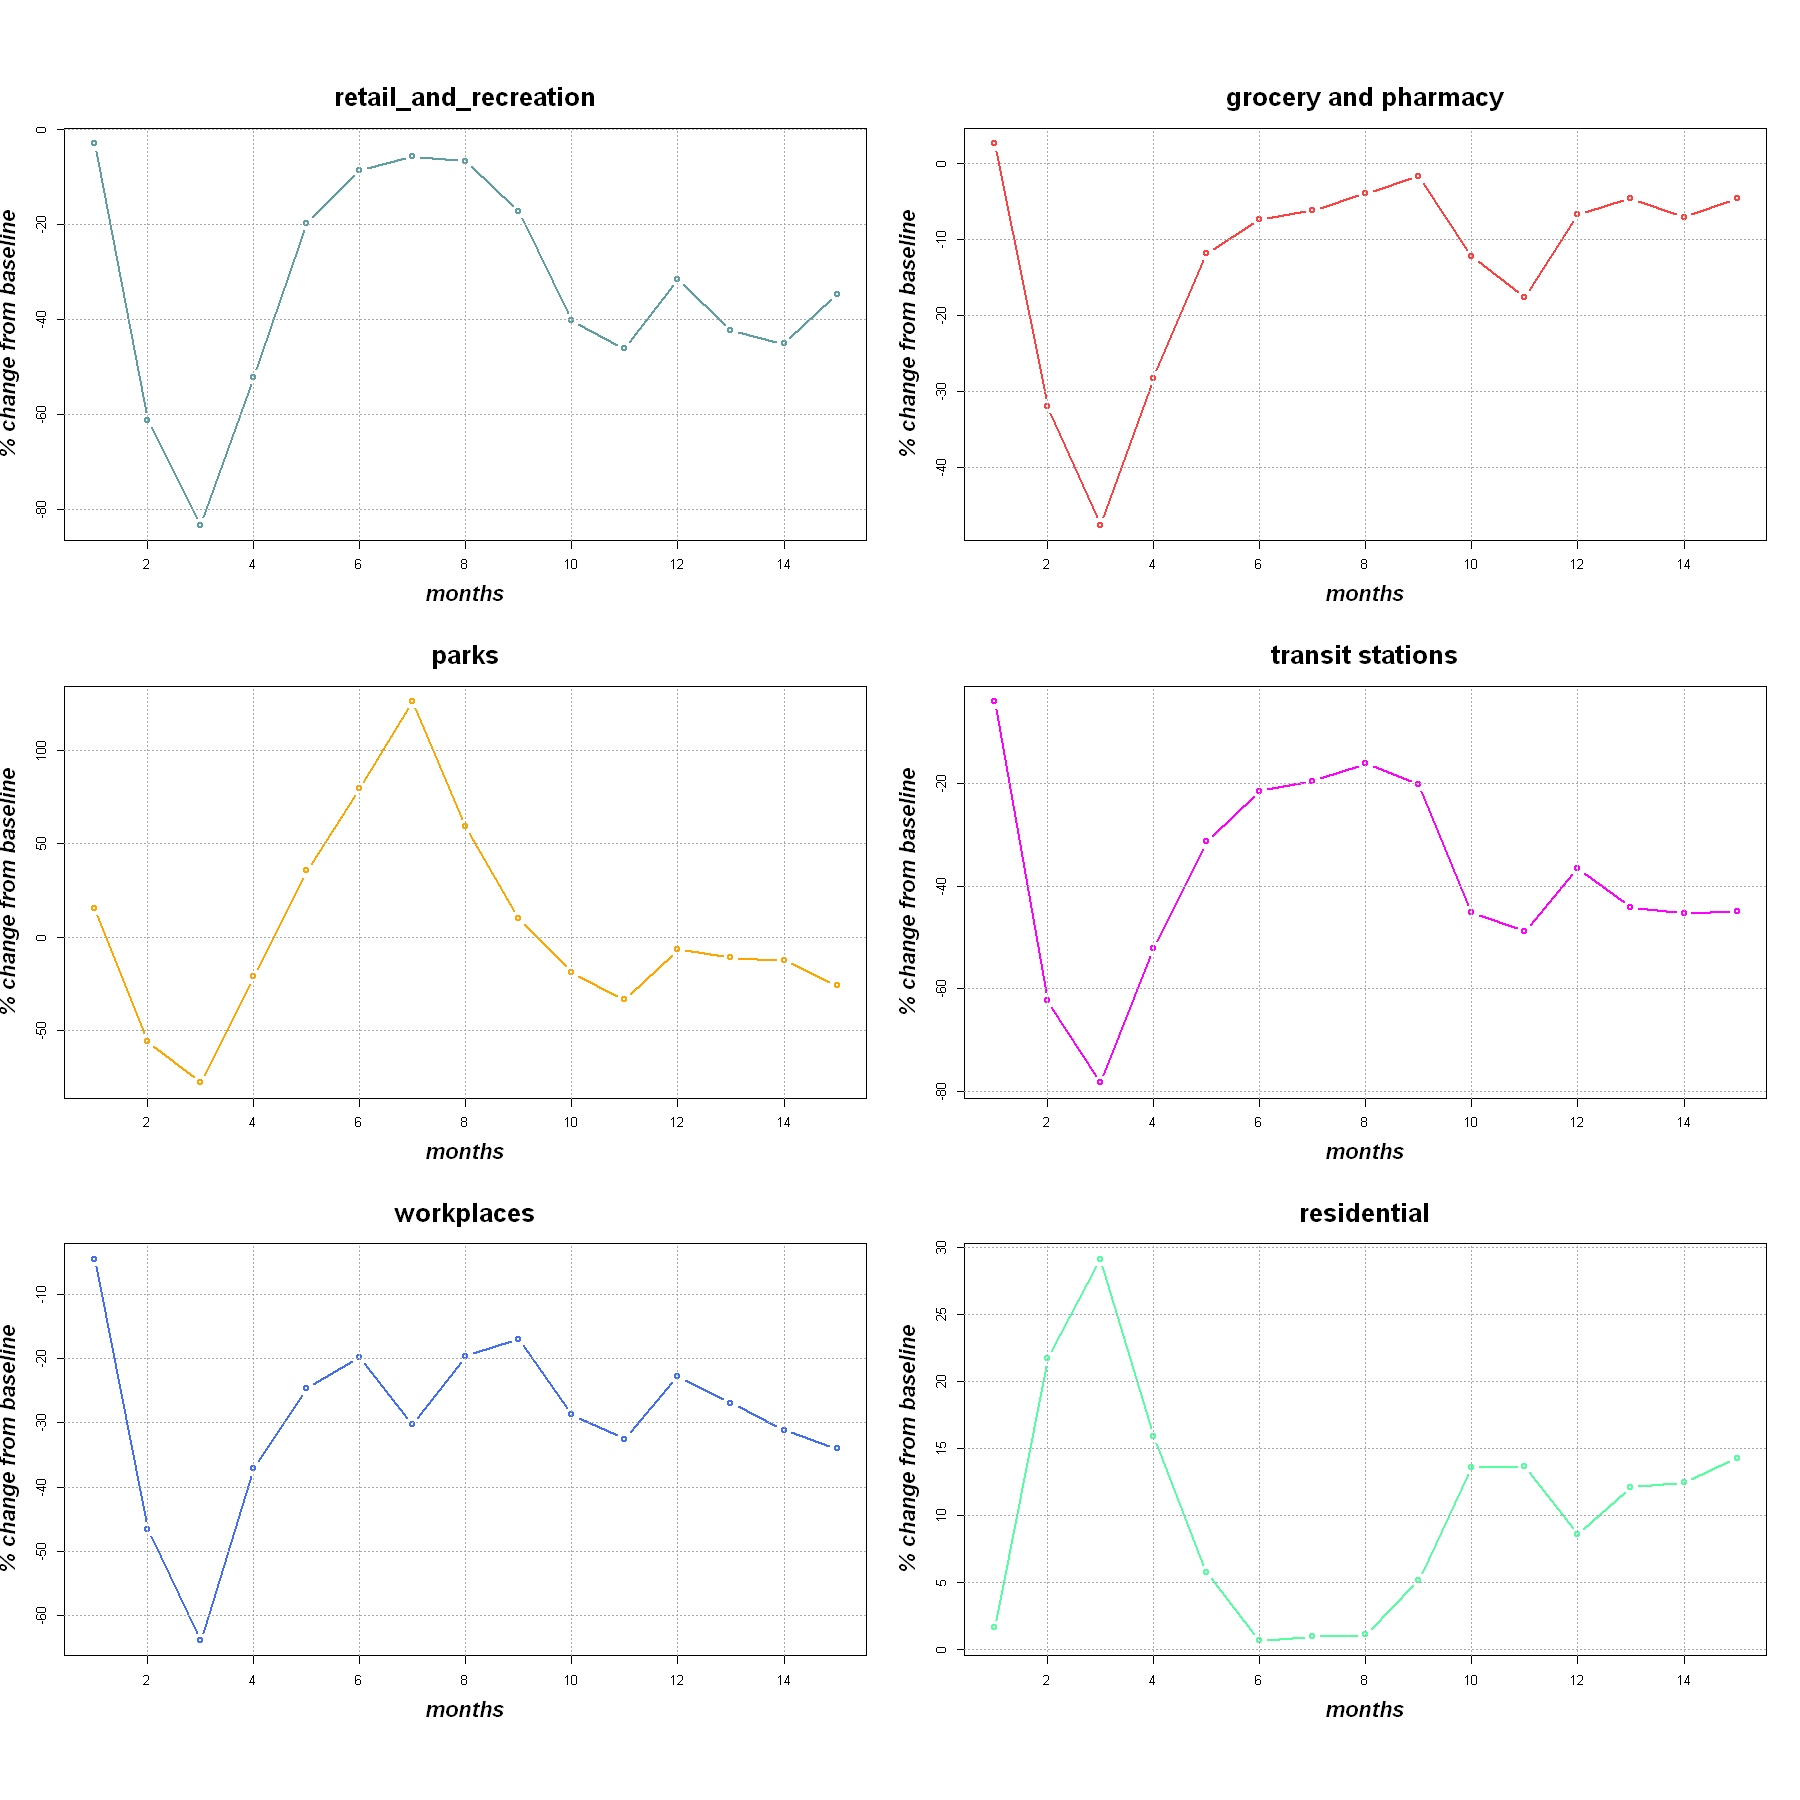

In [11]:
graph(data=month_IT,xlab="months",country="")

In [12]:
MG<-mbdata_ger[mbdata_ger$sub_region_1=="",]
MG<-MG[,which(colnames(MG)=="date"):ncol(MG)]

#create a new dataframe
MG<-data.frame("date"=MG$date,"week"=week(MG$date),"month"=month(MG$date),MG[,-1])

MG$week[which(MG$week==max(MG$week) )[1]:length(MG$week)]<-MG$week[which(MG$week==max(MG$week) )[1]:length(MG$week)]+54

MG$month[which(MG$month==max(MG$month) )[1]:length(MG$month)]<-MG$month[which(MG$month==max(MG$month) )[1]:length(MG$month)]+12

#averanging on weeks and months
week_GE<-as.data.frame(sapply(MG[,c(-1,-3)], tapply, MG$week,mean))

month_GE<-as.data.frame(sapply(MG[,c(-1,-2)], tapply, MG$month,mean))

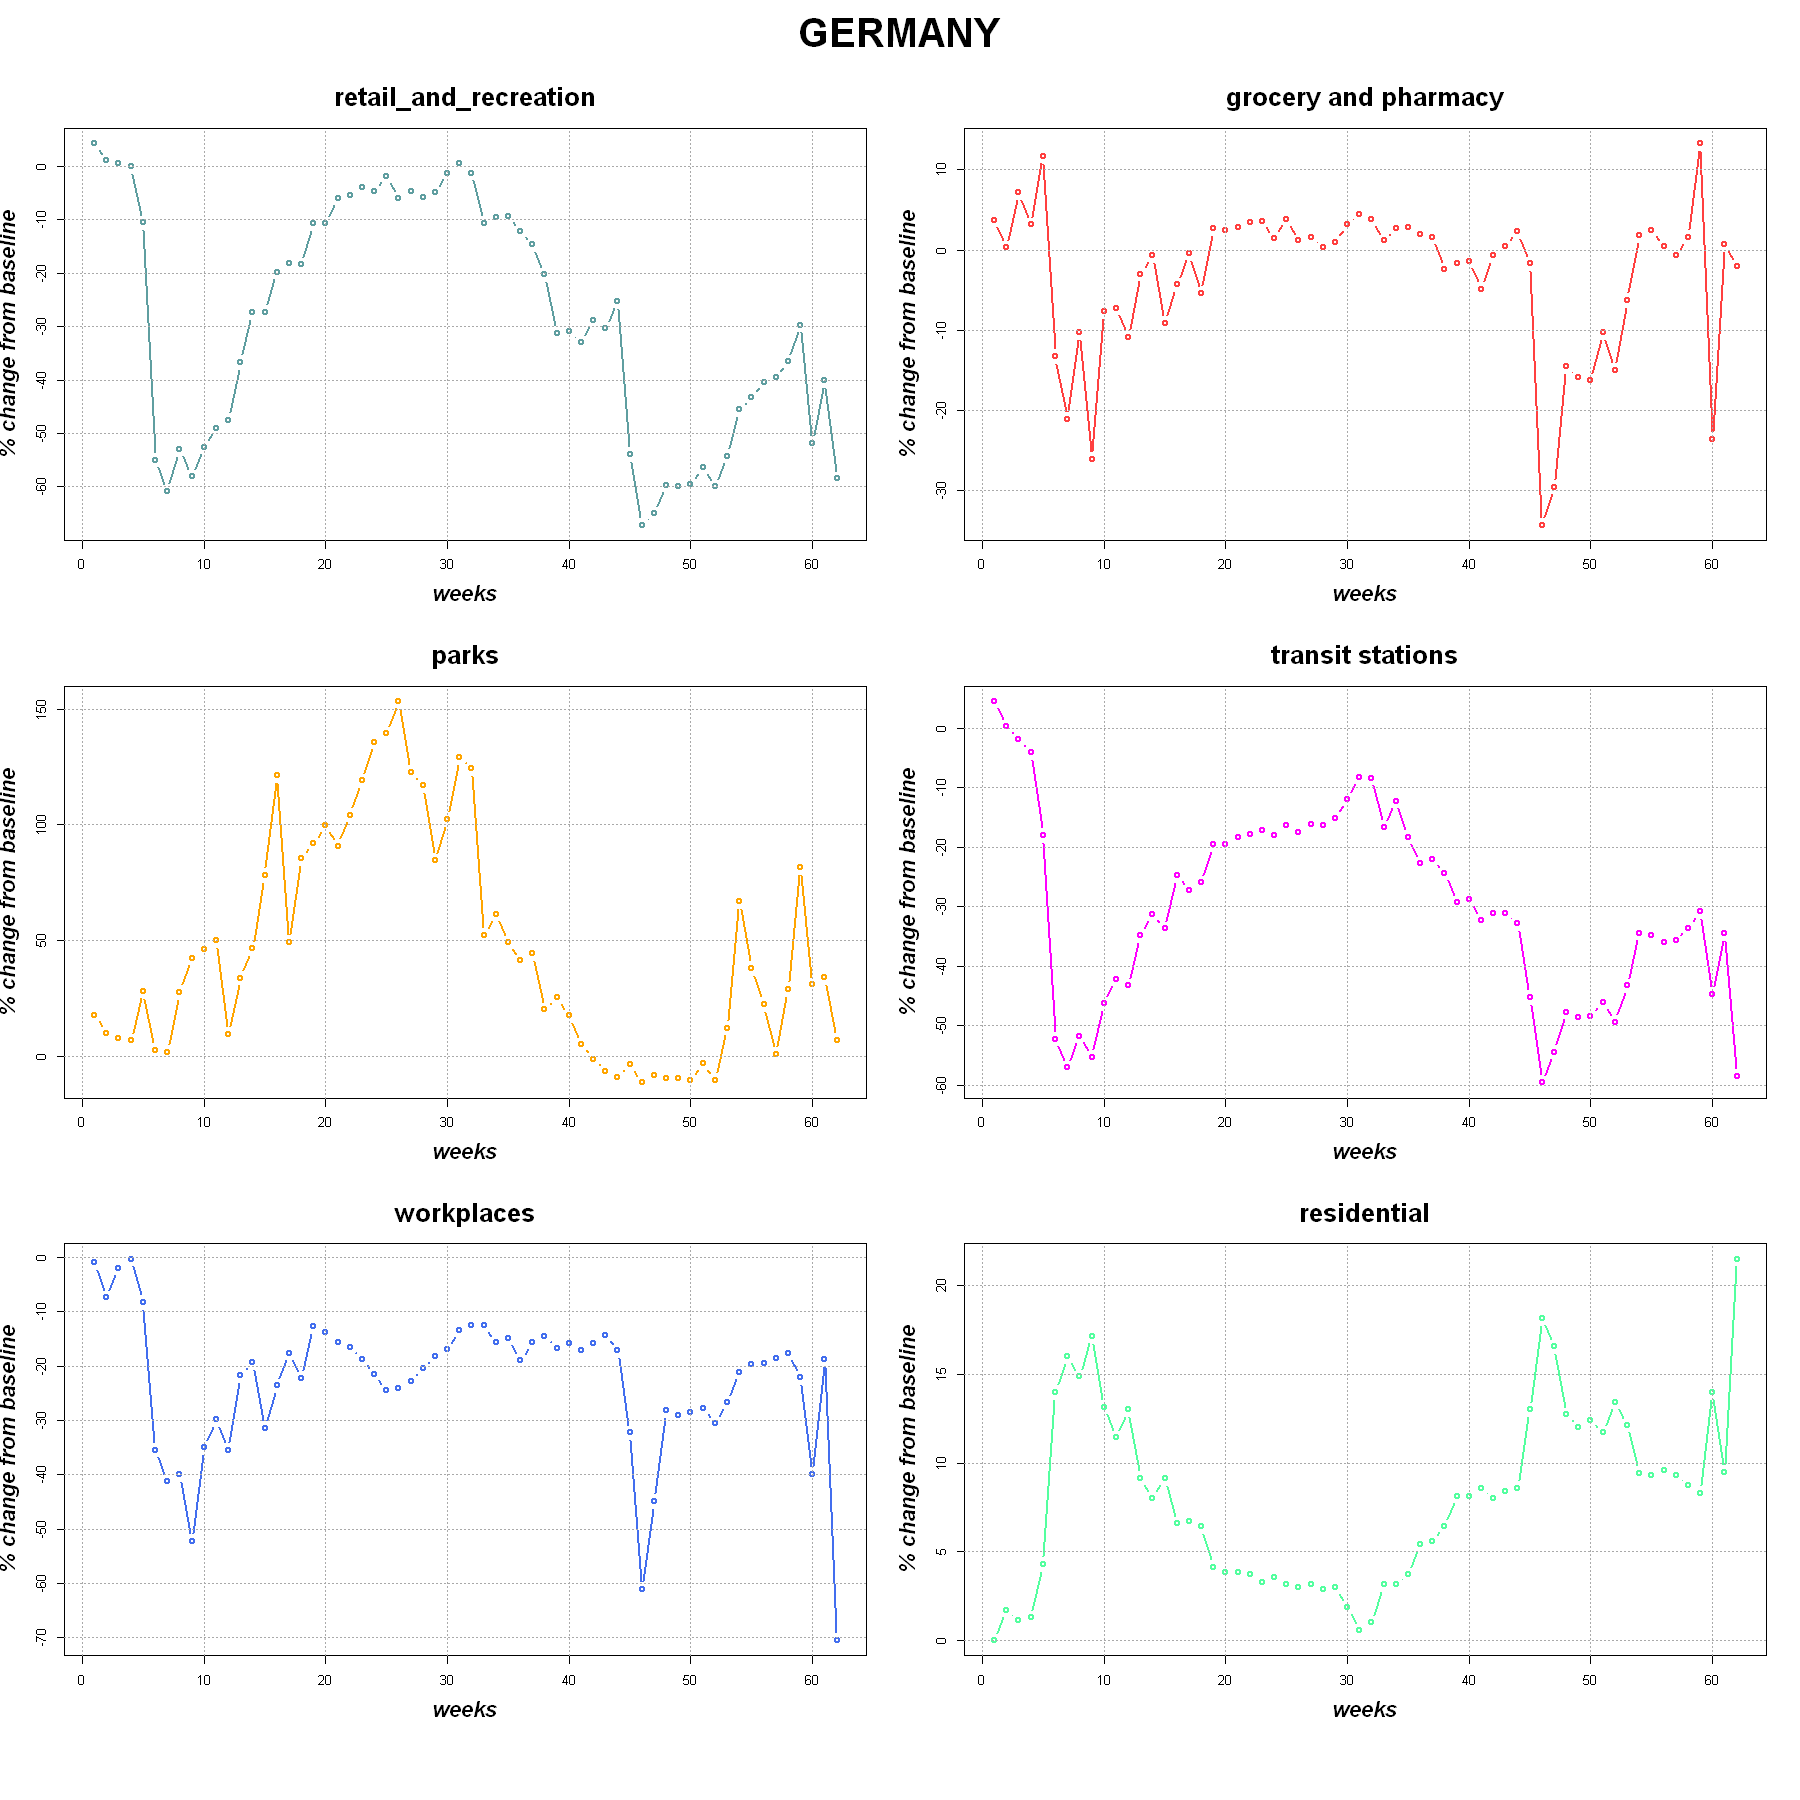

In [13]:
graph(data=week_GE,xlab="weeks",country="GERMANY")

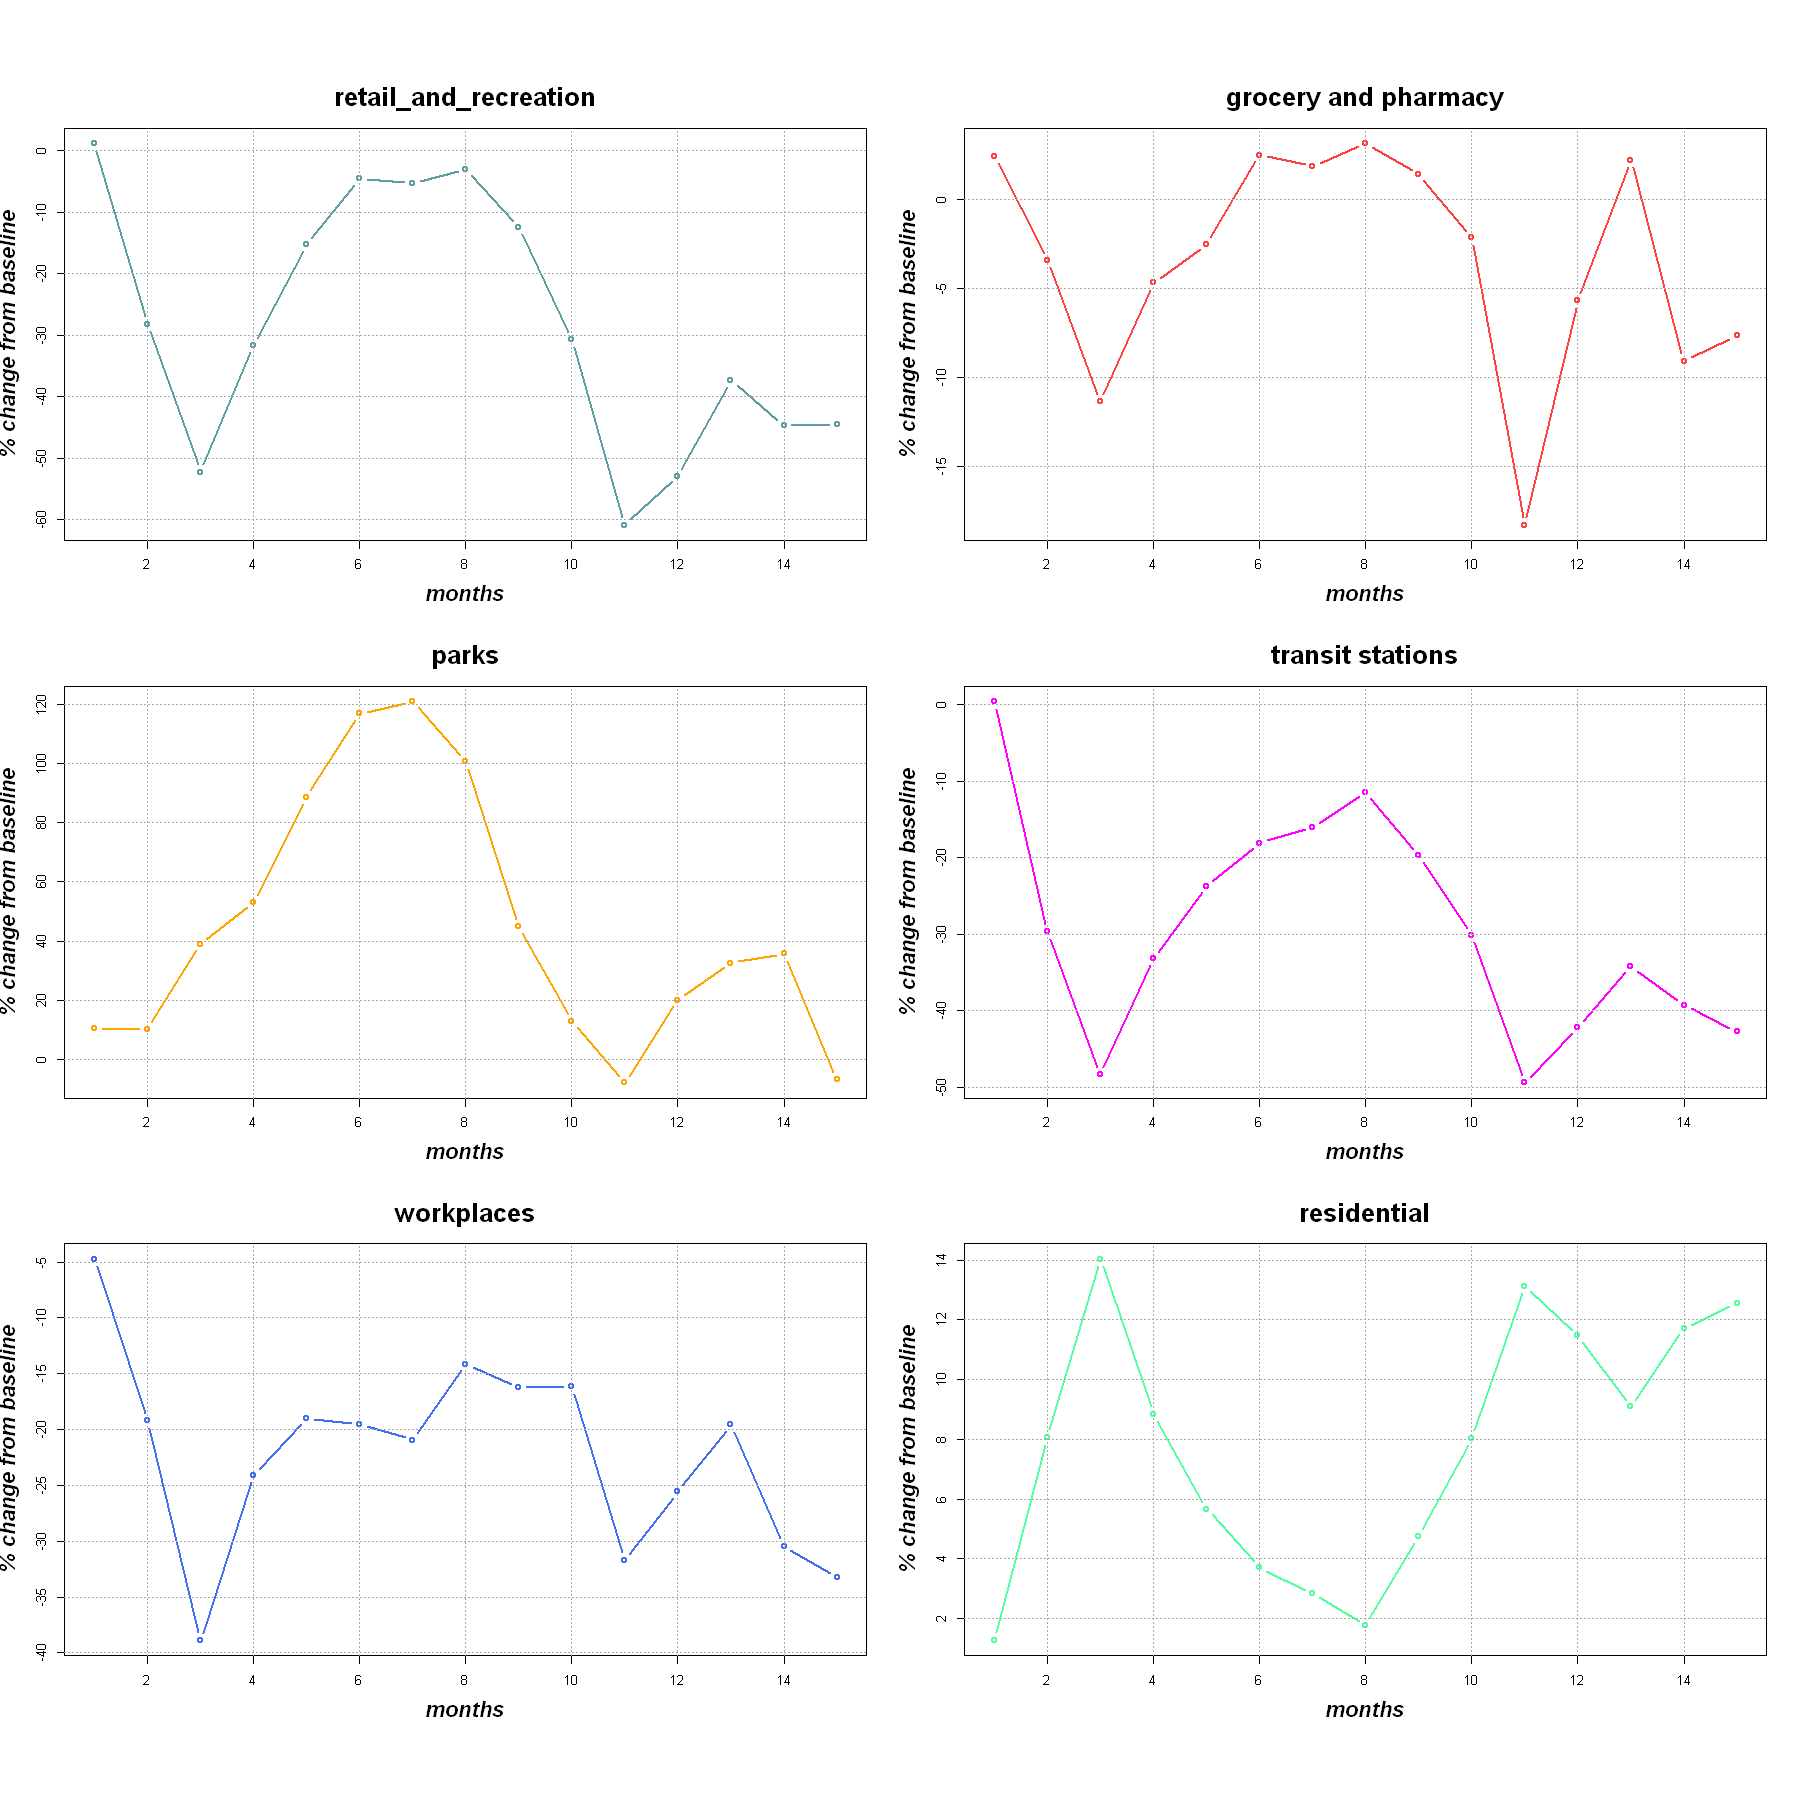

In [14]:
graph(data=month_GE,xlab="months",country="")

###  quantify the impact of COVID-19 restrictions on mobility situations

#### Probably the best choice to quantify the impact of COVID-19 restrictions is computing the  average on each field

In [15]:
w_mean_i<-as.data.frame(sapply(week_IT[,-1],mean) ,FactorsAsString=TRUE)
m_mean_i<-as.data.frame(sapply(month_IT[,-1],mean) ,FactorsAsString=TRUE)

w_mean_g<-as.data.frame(sapply(week_GE[,-1],mean) ,FactorsAsString=TRUE)
m_mean_g<-as.data.frame(sapply(month_GE[,-1],mean) ,FactorsAsString=TRUE)


quantify_restrictions<-data.frame("week_IT"=w_mean_i[,1],
                                  "month_IT"=m_mean_i[,1],
                                  "week_GE"=w_mean_g[,1],
                                  "month_GE"=m_mean_g[,1],row.names=row.names(w_mean_i))



In [16]:
quantify_restrictions

,week_IT,month_IT,week_GE,month_GE
retail_and_recreation_percent_change_from_baseline,-33.686060,-33.250804,-28.621928,-28.178413
grocery_and_pharmacy_percent_change_from_baseline,-12.863863,-12.629862,-3.322773,-3.418746
parks_percent_change_from_baseline,4.238863,4.169846,45.740591,44.734112
transit_stations_percent_change_from_baseline,-38.822005,-38.023282,-29.904378,-29.173262
workplaces_percent_change_from_baseline,-30.202573,-29.310292,-22.943164,-22.238638
residential_percent_change_from_baseline,10.713710,10.436918,7.967742,7.794199
